## Please watch the explainer video : https://drive.google.com/file/d/15e6QlLEIBPTlqzsZ6C3Ot7Igp2UmvvYm/view

So once your family planned to sell the car which you have. They are just thinking that how much money they will get by selling your car.
	
Suddenly your relative came he also discussed the same problem they are also planning to sell their car but have no idea that how much money they will get. 

Now to help everyone you took this problem on your hands and by using your Machine Learning skills you will find approximate how much money your family and your relative’s family will get by selling their cars. 


How can we import the needed libraries ?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

How can we import the dataset ?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car=pd.read_csv('/content/drive/MyDrive/Dataset/cars_data.csv')

How can we see the first 5 rows of data ?

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


How can we find the number of rows and columns in the data ?

In [ ]:
car.shape

(892, 6)

How can we find the basic info about the data like data type of different columns, null and non-null contents ?

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Data Analysis and Cleaning 

### Now we are going to analyse the different columns of data and see what are the problems which they have and how can we sort them.

How can we find the types of unique data in year column ?

In [ ]:
car['year'].unique() 

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

### Ask student if he sees any problem in data.
### Problems in year column:
1. Its in object should be in int type. 
2. It is having lot of waste data which are not years. 

In [ ]:
car['name'].unique() 

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

### Ask student if he sees any problem in data.
### Problems in name column:
1. Names are pretty inconsistent 
2. There are non-name values
3. some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo' 

In [ ]:
car['company'].unique() 

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

### Ask student if he sees any problem in data.
### Problems in name column:
1. Names are pretty inconsistent
2. They are having non-company values. 

In [ ]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

### Ask student if he sees any problem in data.
### Problems in Price column:
1. It in object should be in int type. 
2. It is having non-Price data like 'Ask for Price'
3. It shouldn't have commas between price else we'll not be able to do mathematical operations.

In [ ]:
car['kms_driven'].unique() 

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

### Ask student if he sees any problem in data.
### Problems in kms_driven column:
1. Its in object should be in int type. 
2. It is having kms in last and is having commas. 

In [ ]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

### Ask student if he sees any problem in data.
## Problems in fuel_type column:
1. Its in object should be in int type.
2. It is having nan as data type which should not be there.


## Quality
* names are pretty inconsistent
* names have company names attached to it
* some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
* company: many of the names are not of any company like 'Used', 'URJENT', and so on.
* year has many non-year values
* year is in object. Change to integer
* Price has Ask for Price
* Price has commas in its prices
* Price is in object should be in int
* kms_driven has object values with kms at last
* It has nan values and two rows have 'Petrol' in them
* fuel_type has nan values


How can we make the copy of data ?

In [ ]:
backup = car.copy()

How can we choose only numeric values in year column and remove all other values ?

In [ ]:
car = car[car['year'].str.isnumeric()]

How to convert data type of year column from object to int ?

In [ ]:
car['year']= car['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's check if it is changed. 

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


# End of Part 1


---



# End of Part 2 

Let's check car Price now 

In [ ]:
car['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

How to remove the 'Ask for Price' from Price column ?

In [ ]:
car = car[car['Price']!='Ask For Price']

Check it again.

In [ ]:
car['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

How we can remove commas from Price column and also convert it to int ?

In [ ]:
car['Price'] = car['Price'].str.replace(',','').astype(int)

car['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int64

Let's now check the kms_driven column. 


In [ ]:
car['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

How can we remove the kms from last and also remove the commas from number of kms ? 

In [ ]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

Now the kms_driven is also having non-numerical values we need to remove them and we need only numerical or integer values.  

In [ ]:
car= car[car['kms_driven'].str.isnumeric()]

Let's convert the data type of kms_driven from object to integer. 

In [ ]:
car['kms_driven']=car['kms_driven'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's see the car now. 

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


Now let's clean the case where fuel_type data is not available. 

In [ ]:
car = car[~car['fuel_type'].isna()]

We were having another very big problem in the names column the names were very ambiguous so what we are going to do is that we are going to make it only 2 words. Let's see how we can do it. 

In [ ]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


We want to remove outliers that means a data which is too much. It may change/disturb the predictions of other datas. Hence we'll remove them. Generally such values are ther because of mistake. We'll remove the car which have price more than 50 lakhs. 

In [ ]:
car[car['Price']>5000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [ ]:
car = car[car['Price']<5000000].reset_index(drop=True)

Similarly we have seen there is just one car which has run more than 3 lakh km so we'll remove that one too. 

In [ ]:
car = car[car['kms_driven']<300000].reset_index(drop=True)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    int64 
 3   Price       814 non-null    int64 
 4   kms_driven  814 non-null    int64 
 5   fuel_type   814 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [ ]:
car.to_csv('Cleaned_Car_Data.csv')

## Cleaned Data

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    int64 
 3   Price       814 non-null    int64 
 4   kms_driven  814 non-null    int64 
 5   fuel_type   814 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [ ]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,814,814,814.000000,8.140000e+02,814.000000,814
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,427
mean,NaN,NaN,2012.445946,4.019921e+05,45842.547912,NaN
std,NaN,NaN,4.006625,3.817812e+05,32017.452360,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56681.000000,NaN


### Checking relationship of Company with Price

In [ ]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

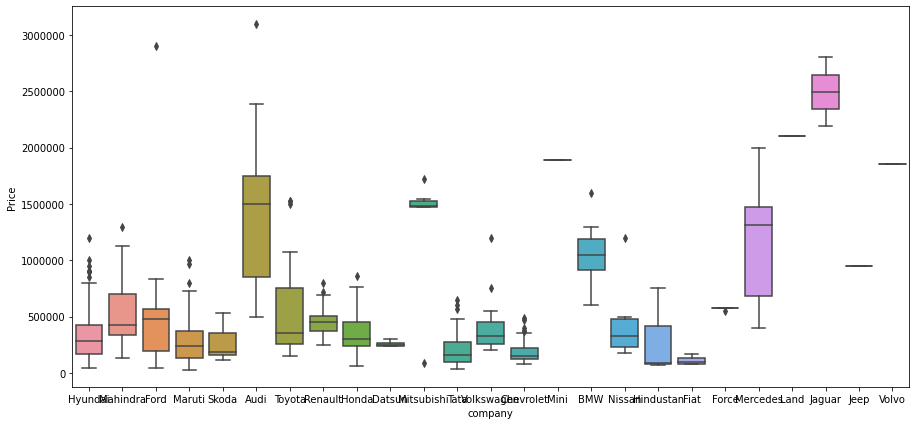

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
plt.ticklabel_format(style='plain', axis='y') # Here in x-axis we can see that the data is overlapped
plt.show()

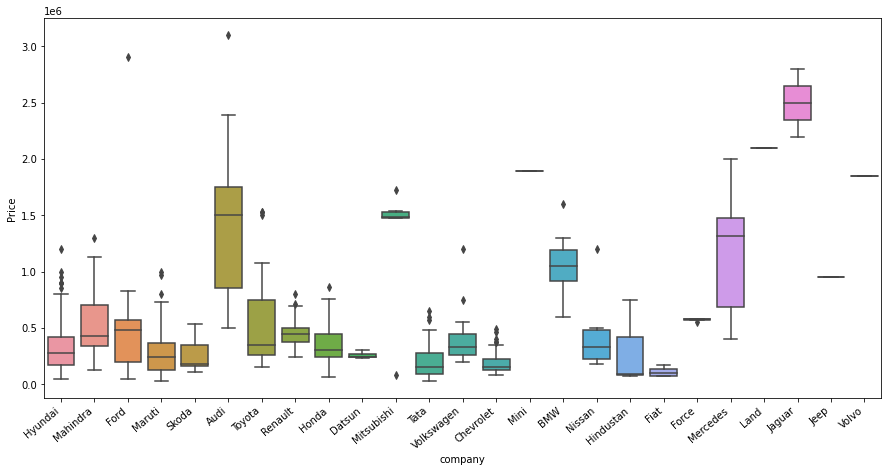

In [ ]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right') # Please observe we have tilted names by 40 degree using rotation 
plt.show()

### Checking relationship of Year with Price

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


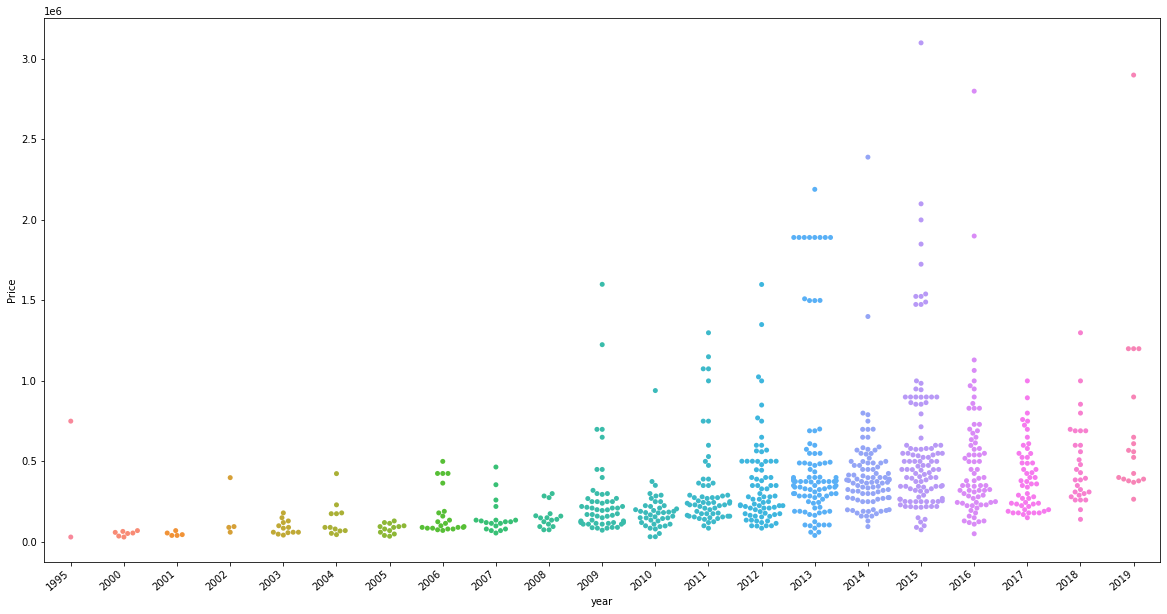

In [ ]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

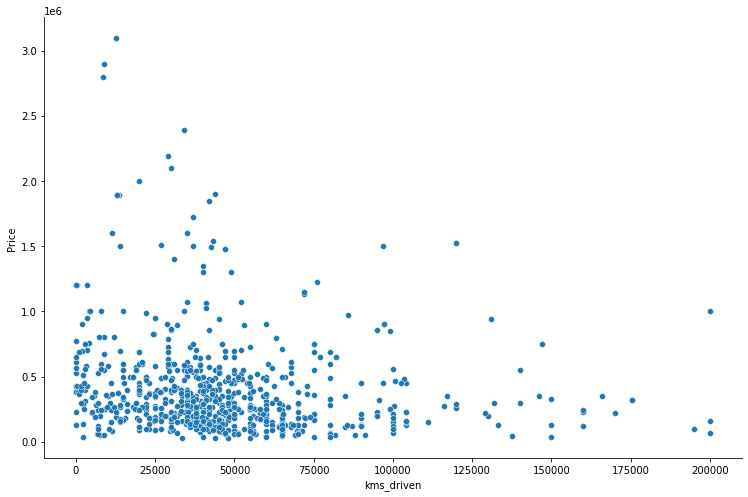

In [ ]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

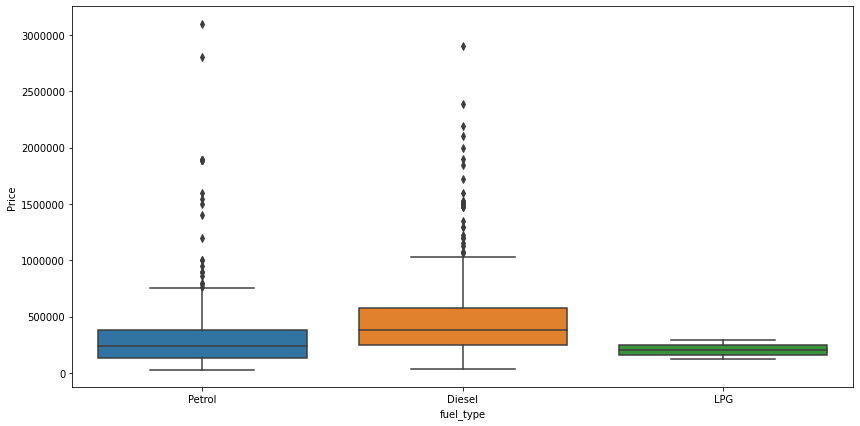

In [ ]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)
plt.ticklabel_format(style='plain', axis='y')

### Relationship of Price with FuelType, Year and Company mixed

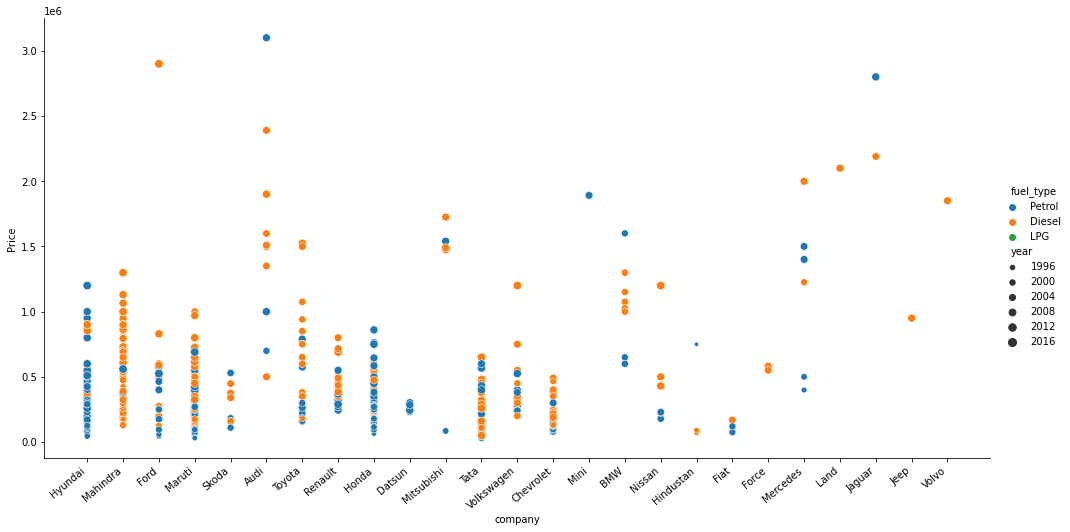

In [ ]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# End of Part 2 



---



# End of Part 3 

### Extracting Training Data

Let's make 2 different data frames in which one will contain other details and other will contain only price which we have to predict. 

In [ ]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [ ]:
X['name'].describe()

count                     814
unique                    254
top       Maruti Suzuki Swift
freq                       51
Name: name, dtype: object

In [ ]:
y.shape

(814,)

## Model 

Can also be written like this where only to drop price. 

In [ ]:
X = car.drop(columns='Price')
y = car['Price']

In [ ]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


Here we are splitting the data in 4 parts: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

We are importing different things from sklearn. Let's see them one by one. 


*   r2_score :  "Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model." It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

*   OneHotEncoder:  Machines understand numbers, not text. We need to convert each text category to numbers in order for the machine to process them using mathematical equations.That’s primarily the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.
  One-Hot Encoding is the process of creating dummy variables.

*  Pipeline : Machine Learning projects need iterative progress. For example, we clean and prepare data for modeling with transforming to the proper format, run the model, get results, improve the model/change the model and work on feature engineering, get new results, compare them with other results, etc. It is not easy and smart to do every step again and again. To solve this problem, we can use a pipeline to integrate steps of machine learning workflow.
Pipelines are super useful for transforming and training data quickly.




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']]) # We created onehotencoder 

OneHotEncoder()

In [ ]:
ohe.categories_ 

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder='passthrough')
# remainder = passthrough means passing columns which are not transformed as it is.


In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr) # Made pipeline and saved it in variable named pipe 
# What pipeline did was it transformed the columns which were needed and than passed in to linear regresssion. 

In [ ]:
pipe.fit(X_train, y_train) # Trained the pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [ ]:
y_pred = pipe.predict(X_test) # saved the prediction for test values in y_pred

In [ ]:
r2_score(y_test, y_pred) # Calculated the score of prediction. 

0.4333032596422991

#### Finding the model with a random state of TrainTestSplit where the model was found to give better score

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [ ]:
scores=[] # We made list named as scores. 

for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=0.1, random_state=i) # We have run the loop by using different random state. 

    lr=LinearRegression()

    pipe=make_pipeline(column_trans,lr)

    pipe.fit(X_train,y_train)

    y_pred=pipe.predict(X_test)

    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores) # This finds the value where score was the highest

427

In [ ]:
scores[np.argmax(scores)] # Now the scores are 94 percent. 

0.9313212178067648

#### The best model is found at a certain random state 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))

lr=LinearRegression()

pipe=make_pipeline(column_trans,lr)

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

r2_score(y_test,y_pred)

0.9313212178067648

In [ ]:
car['name'].value_counts().head(15)

Maruti Suzuki Swift     51
Maruti Suzuki Alto      42
Maruti Suzuki Wagon     28
Maruti Suzuki Ertiga    16
Hyundai Santro Xing     15
Hyundai Elite i20       15
Hyundai Grand i10       15
Maruti Suzuki Dzire     14
Honda City              13
Maruti Suzuki Zen       13
Honda City 1.5          11
Honda Amaze             11
Tata Indigo eCS         11
Mahindra Scorpio S10    11
Toyota Corolla Altis    10
Name: name, dtype: int64

In [ ]:
car[car['name']=='Honda City' ]

,name,company,year,Price,kms_driven,fuel_type
44,Honda City,Honda,2015,499999,55000,Petrol
69,Honda City,Honda,2015,448999,54000,Petrol
173,Honda City,Honda,2015,599999,30000,Diesel
175,Honda City,Honda,2014,544999,45000,Diesel
186,Honda City,Honda,2015,448999,54000,Petrol
233,Honda City,Honda,2012,399999,45000,Petrol
234,Honda City,Honda,2015,599999,39000,Diesel
299,Honda City,Honda,2011,284999,55000,Petrol
302,Honda City,Honda,2015,644999,39000,Petrol
305,Honda City,Honda,2014,584999,39000,Petrol


In [ ]:
car_name = input("Please Enter the Car Name ")
company = input("Please Enter the company name ")
year = int(input("Please enter the year in which it has been bought "))
km_travelled = int(input("Please enter the number of km it has travelled "))
typefuel = input("Please enter the type of fuel it uses Petrol/Diesel/LPG ")


PredictedPrice = pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array([car_name,company,year,km_travelled,typefuel]).reshape(1,5)))

print("Hence according to algorithm the predicted price is ", round(PredictedPrice[0],2))

Please Enter the Car Name Honda City
Please Enter the company name Honda
Please enter the year in which it has been bought 2015
Please enter the number of km it has travelled 3000
Please enter the type of fuel it uses Petrol/Diesel/LPG Petrol
Hence according to algorithm the predicted price is  542349.56


In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Alto','Maruti',2015,100,'Petrol']).reshape(1,5)))

Let's dump the model. 


How to dump a model ? 

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))